# **Question 1**

**Round off error in long term integrations of planetary orbits**

Modelling the growth of the error over N operations as a random walk gives *Brouwer's Law*, which states that the total error after N steps will be $$ \approx \sqrt{N}\epsilon$$ where $\epsilon \sim 10^{-16}$ for a double precision float.

The *semi-implicit Euler method* involves updating the velocity and position of the planet from timestep *n* to timestep $n + 1$ according to
$$ v_{n+1} = v_n + a_n\Delta t$$
$$ x_{n+1} = x_n + v_{n+1}\Delta t$$

In this scheme, the velocity is updated first using the acceleration, and then the value of position is updated using the new velocity.

### a) **Semi-Implicit Euler Method**
Write a code which uses the semi-implicit Euler method to follow the Earth's orbit around the sun. Integrate the orbit for 1 year and plot orbit in the x-y plance to check the Earth moves as expected.

Assume:
- $\mu \approx (GM)_{Sun} = 1.3271 \times 10^{20}$ N
- $1 AU = 1.496 \times 10^{11}$ m

$$F = ma = \frac{\mu m}{r^2}$$
$$ \therefore a = \frac{\mu}{r^2}$$


In [ ]:
https://stackoverflow.com/questions/61572804/earth-orbit-plot-python

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set Up Variables
gm_Sun = 1.3271 * (10**20) # Newtons
rad = 1.496 * (10**11) # Metres

mu = rad**3 * 4 * np.pi**2

a_c = [gm_Sun/(rad**2), 0] # Magnitude of acceleration of Earth toward the sun,units of m/s

# Sun always at (x, y) = (0, 0)
x_0 = rad # Initial Earth coordinates on the x-axis
y_0 = 0

vx_0 = 0
vy_0 = (2*np.pi*rad)/(365.25 * 86400) # Assumed initial velocity of Earth around the sun, assuming orbit is circular, velocity only in y-direction (tangential to acceleration vector)

dt = 1 # Delta t is 1 second
n = len(range(int(365.25 * 86400)/dt))

def update_a(mu, x, r):
    a = (mu*x)/(r**3)
    return a

def update_v(v, a, dt):
    new_v = v + a*dt
    return new_v

def update_x(x, new_v, dt):
    new_x = x + new_v * dt
    return new_x

In [5]:
x = np.zeros_like(n)
y = np.zeros_like(n)
vx = np.zeros_like(n)
vy = np.zeros_like(n)

x[0], y[0] = x_0, y_0
vx[0], vy[0] = vx_0, vy_0

for i in range(0, int(365.25 * 86400), dt):
    vx[i+1] = vx[i] + a_c[0]*dt
    
   

In [ ]:
    vx[i + 1] = update_v(vx[i], update_a(mu, x[i], rad), dt)
    vy[i + 1] = update_v(vy[i], update_a(mu, y[i], rad), dt)

    x[i + 1] = update_x(x[i], vx[i + 1], dt)
    y[i + 1] = update_x(y[i], vy[i + 1], dt) 

Text(0, 0.5, 'y')

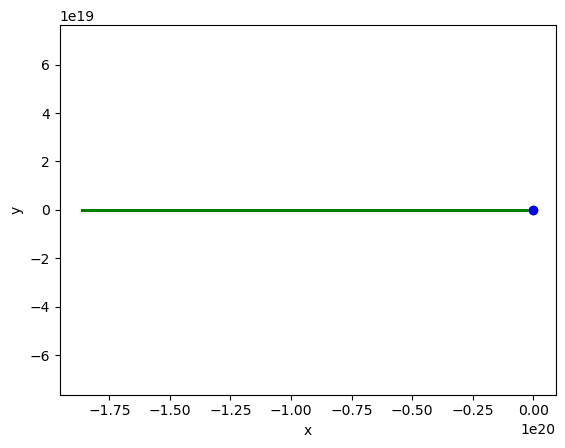

In [6]:
plt.plot(x, y, 'go', markersize = 1, label = 'Orbit Path')
plt.plot(0, 0, 'yo', label = 'Sun')        #yellow marker for the sun
plt.plot(x[0], 0, 'bo', label = 'Earth Initial Positon')  #dark blue marker for earth's initial position
plt.axis('equal')
plt.xlabel ('x')
plt.ylabel ('y')